In [9]:
from node2vec import Node2Vec
import igraph as ig
import matplotlib.pyplot as plt

In [2]:
def get_graph_embedding(graph, dimensions=64, walk_length=5, num_walks=200, workers=4):
    from node2vec import Node2Vec
    import igraph as ig

    # Let's assume you already have an iGraph graph
    #graph = ig.Graph.Erdos_Renyi(n=100, m=500)

    # Convert iGraph graph to NetworkX format (required by node2vec library)
    nx_graph = graph.to_networkx()

    # Precompute probabilities and generate walks
    node2vec = Node2Vec(nx_graph, dimensions=dimensions, 
                        walk_length=walk_length, num_walks=num_walks, workers=workers)

    # Embed nodes
    model = node2vec.fit(window=10, min_count=1, batch_words=4)
    
    import numpy as np
    N = len(model.wv.index_to_key)  # Get the number of nodes

    # Initialize an empty matrix
    embedding_matrix = np.zeros((N, model.vector_size))

    # Loop through the model to get the vectors
    for i in range(N):
        embedding_matrix[i] = model.wv[str(i)]  # model.wv vectors are ordered by the node's string value

    return pd.DataFrame(embedding_matrix, index=graph.vs['name'])

def multiplex_graph_embedding(MG, dimensions_list=[64,32], walk_length_list=[5,5], 
                              num_walks_list=[100,100], workers=4):
    """
    MG: multiplex graph, a list of igraph object
    """
    g_dtw, g_scenic = MG[0], MG[1]
    z0=get_graph_embedding(g_dtw,
                           dimensions=dimensions_list[0], 
                           walk_length=walk_length_list[0], 
                           num_walks=num_walks_list[0], workers=workers)
    z1=get_graph_embedding(g_scenic, 
                           dimensions=dimensions_list[1], 
                           walk_length=walk_length_list[1], 
                           num_walks=num_walks_list[1], workers=workers)
    import pandas as pd
    df = pd.merge(left=z0, right=z1, left_index=True, right_index=True)
    df.columns = range(1, len(df.columns) + 1)
    #embedding_matrix = np.concatenate([z0,z1], axis=1)
    return df

In [3]:
import pickle

with open("./ABM-MG.pk", 'rb') as f:
    MG_ABM = pickle.load(f)
    
# loading gene expression time series
ExprPath = "ABM-time_series.csv"
import pandas as pd
time_series = pd.read_csv(ExprPath, index_col=0)


In [4]:
z_ABM = multiplex_graph_embedding(MG_ABM, 
                                 dimensions_list=[64,32], 
                                 walk_length_list=[50,50], 
                                 num_walks_list=[50,50], 
                                 workers=10)

Generating walks (CPU: 10): 100%|██████████| 5/5 [00:52<00:00, 10.43s/it]







In [5]:
z_ABM


,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
Mrpl15,0.003138,-0.003788,0.015326,0.004938,0.012931,0.013865,-0.005635,0.002806,-0.007419,-0.007522,...,0.058450,0.017862,0.069156,-0.232930,-0.335374,0.430265,-0.529077,-0.966975,0.631816,0.561157
Vcpip1,0.779743,-0.170267,0.000982,0.552940,0.876344,-0.294199,-0.329802,0.804952,-1.297535,0.651471,...,0.108307,-0.192330,0.207761,0.128484,-0.743729,0.374388,-0.168599,-0.155834,0.310868,-0.007061
Snhg6,-0.168306,0.108929,-0.410915,1.026316,0.767103,-0.430088,0.631492,0.443322,-0.144479,-0.533636,...,0.340357,-0.503890,-0.122535,0.179405,-0.142834,0.058121,-0.481895,-0.313422,0.019653,0.093389
Cops5,-0.013350,-0.014125,0.003071,-0.005718,0.006670,-0.004245,0.005456,0.004332,0.003610,-0.004445,...,-0.009260,-0.090831,-0.455479,-0.364821,-0.491434,0.347076,-0.402395,0.124992,0.128033,0.101931
Arfgef1,0.012364,-0.007787,0.012346,0.011009,0.008387,0.012752,0.002128,-0.000580,-0.002920,-0.002810,...,-0.622473,-0.056809,0.188186,1.878497,-0.246758,0.501306,0.072246,-0.043852,-0.024627,0.071712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uty,0.135665,0.015304,0.138034,0.818066,-0.134427,-0.106959,-0.401845,0.686937,-1.530928,0.129786,...,-0.588698,-0.655117,0.326439,0.718781,-0.127152,0.045470,-0.614709,-0.571450,0.289628,1.050581
Ddx3y,0.329727,-0.101533,-0.521034,0.565748,-0.561564,0.971056,0.011866,0.296435,-0.458802,0.140241,...,0.714654,0.197098,-0.351207,0.297652,-0.461447,-0.074362,0.286280,-0.098523,-0.624905,0.311893
Kdm5d,0.525732,-0.238162,0.157923,0.877026,0.287651,0.283514,0.505239,0.190264,-0.400411,0.075650,...,0.131006,-0.359282,-0.129143,-0.306314,-0.353041,-0.434259,-0.418797,0.063491,0.206383,-0.099337
Eif2s3y,0.519047,0.052739,-0.175777,1.360490,0.477596,0.196498,-0.249907,-0.027526,-0.711189,0.090403,...,-0.538854,-0.013640,-0.117069,0.532644,-0.600708,-0.061579,0.017495,-1.176238,0.410423,-0.263793


In [6]:
import pandas as pd
import numpy as np
from umap import UMAP
from sklearn.cluster import KMeans

# Assume we have the following 2D data:
data = z_ABM
use_PCA = True

rownames = data.index
if use_PCA:
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    # first, apply PCA
    pca = PCA(n_components=50)
    data = pca.fit_transform(data_scaled)


    
# apply UMAP
umap = UMAP(n_components=2, min_dist=0.2)
data_umap = umap.fit_transform(data)
data_umap = pd.DataFrame(data_umap, index=rownames, columns=['umap0','umap1'])
gene_membership = data_umap 
gene_membership['gene']=gene_membership.index


/home/csj/micromamba/envs/r430py38/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/csj/micromamba/envs/r430py38/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/csj/micromamba/envs/r430py38/lib/python3.8/site-packages/umap/dist

/home/csj/micromamba/envs/r430py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15  clusters identified by k-means


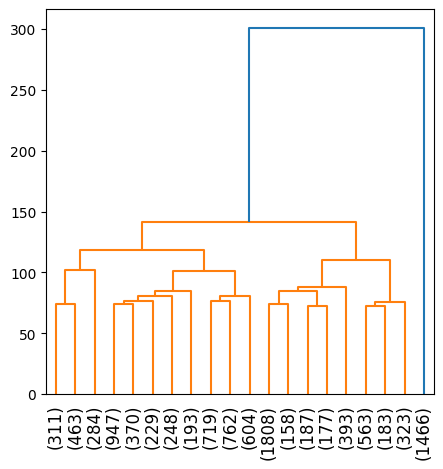

196 clusters identified by hierarchical clustering


In [10]:
##########################################
# set gene membership                    #
##########################################
gene_membership= gene_membership[['gene','umap0','umap1']].copy()

# perform clustering    
kmeans = KMeans(n_clusters=15, random_state=0)
kmeans.fit(data)
membership = kmeans.labels_+1
print(max(membership), ' clusters identified by k-means')
gene_membership['cluster_kmeans'] = membership
gene_membership['cluster_kmeans'] = gene_membership['cluster_kmeans'].astype('category')

from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data, 'ward')
plt.figure(figsize=(5, 5))
dendrogram(linked, 
           orientation='top',
           truncate_mode='lastp',  # show only the last p merged clusters
           p=20,  # show only the last 10 merged clusters
           distance_sort='descending',
           show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()

from scipy.cluster.hierarchy import fcluster
max_d = 30 # this is the maximum distance between two clusters
membership = fcluster(linked, max_d, criterion='distance')
print("%d clusters identified by hierarchical clustering"%max(membership))

gene_membership['cluster_hclust'] = membership
gene_membership['cluster_hclust'] = gene_membership['cluster_hclust'].astype('category')

##########################################
# calculate expression position profiles #
##########################################
gene_membership = pd.merge(left=gene_membership, 
         right=pd.DataFrame(time_series.sum(axis=1), columns=['expr_sum']), 
         left_index=True,right_index=True, how='left')

from scipy.signal import find_peaks
peak_pos = []
for gene in gene_membership.index:
    pos, _ = find_peaks(time_series.loc[gene], height=0.1, width=3)
    pos = np.mean(pos) if len(pos)>0 else np.nan
    peak_pos.append(pos)
gene_membership['peak_pos'] = peak_pos

##########################################
# calculate module information           #
##########################################
cluster_key = 'cluster_hclust' #group by this key
modules = gene_membership.groupby(cluster_key)['gene'].unique()
module_info = pd.DataFrame({ cluster_key:modules.index, 
                            'module_size':[len(mod)for mod in modules],
                            'member':modules})
module_info = pd.merge(left=module_info, 
    right=gene_membership.groupby(cluster_key).mean(numeric_only=True)[["expr_sum","peak_pos"]],
    left_index=True, right_index=True)

module_info = pd.merge(
    left=module_info, 
    right=gene_membership.groupby(cluster_key).std(numeric_only=True)[['peak_pos']],
    left_index=True, right_index=True)

module_info.columns= [cluster_key,'module_size','member','mean_expr','peakpos_mean','peakpos_std']




In [11]:
gene_membership

,gene,umap0,umap1,cluster_kmeans,cluster_hclust,expr_sum,peak_pos
Mrpl15,Mrpl15,19.792810,7.748300,5,5,8.756612,10.000000
Vcpip1,Vcpip1,9.513330,1.406177,12,136,5.965715,NaN
Snhg6,Snhg6,7.532747,2.773077,1,125,22.310921,18.000000
Cops5,Cops5,19.240519,8.286844,5,2,23.073948,19.333333
Arfgef1,Arfgef1,19.494246,6.636347,4,1,4.473321,13.000000
...,...,...,...,...,...,...,...
Uty,Uty,8.178222,6.515467,3,190,1.710194,18.000000
Ddx3y,Ddx3y,9.663601,5.998825,14,177,12.475324,NaN
Kdm5d,Kdm5d,7.590312,7.384040,3,186,0.742206,NaN
Eif2s3y,Eif2s3y,6.283656,3.094308,12,57,14.615129,26.000000


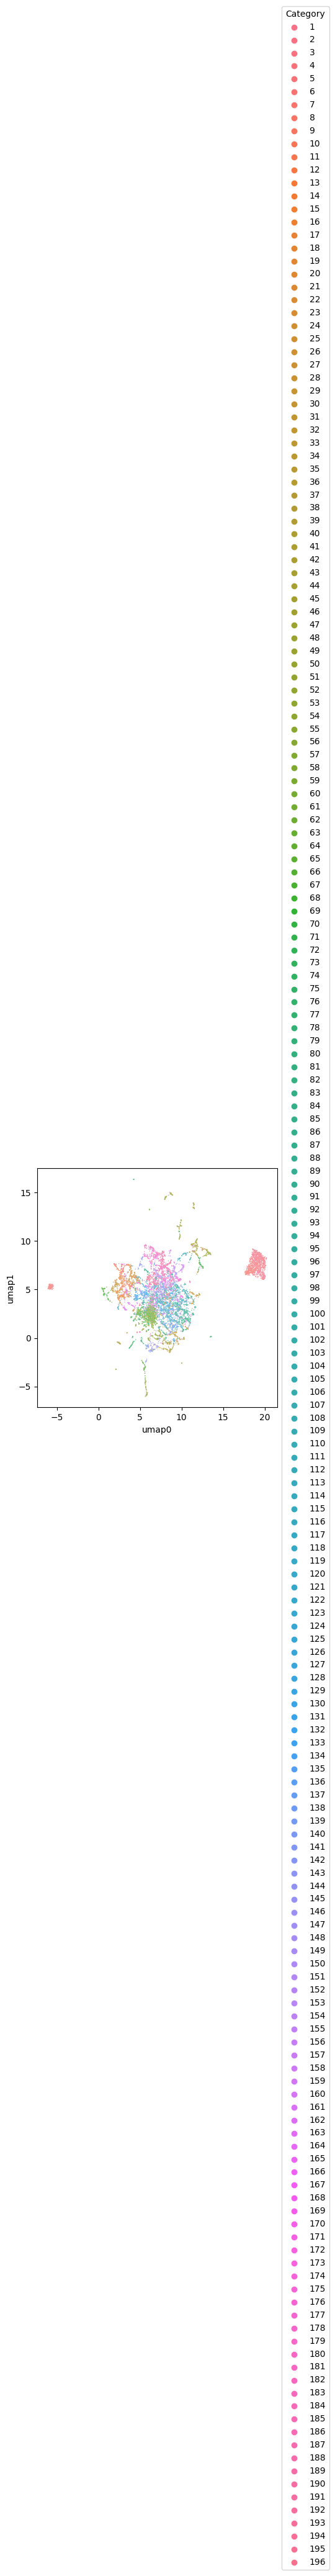

In [13]:
import seaborn as sns
plt.figure(figsize=(5, 5))
ax = sns.scatterplot(data=gene_membership, x='umap0', y='umap1', hue='cluster_hclust', s=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Category')
plt.show()

In [14]:
module_info

,cluster_hclust,module_size,member,mean_expr,peakpos_mean,peakpos_std
cluster_hclust,,,,,,
1,1,191,"[Arfgef1, Smap1, Klf7, Ralb, Lmbrd1, Ptpn18, C...",15.691010,15.768265,6.420852
2,2,302,"[Cops5, Uxs1, Vps4b, Tsn, Dbi, Ddx18, Rrs1, Te...",18.390505,15.487700,5.636165
3,3,100,"[Cops9, Tmem70, Agfg1, Nifk, Rbbp5, Eprs, Ptpn...",16.473144,16.245885,5.933308
4,4,89,"[Ncstn, Adss, Desi2, Abracl, Mcu, Vps26a, Plpp...",13.403971,16.409091,5.795904
5,5,304,"[Mrpl15, Ino80d, Ppip5k2, Suco, Tfb2m, Nvl, Un...",16.762882,16.321515,6.098815
...,...,...,...,...,...,...
192,192,88,"[Fhl2, Inpp1, Hebp2, Stab2, Chpt1, March9, Zbt...",0.684464,20.800000,13.206059
193,193,28,"[Uhmk1, 3110009E18Rik, Acadvl, Tepsin, Kif3a, ...",10.783751,18.727273,7.423783
194,194,79,"[Xpr1, Soat1, Coq8a, Osgepl1, Slc35f5, Dennd1b...",10.279682,16.474044,6.639067


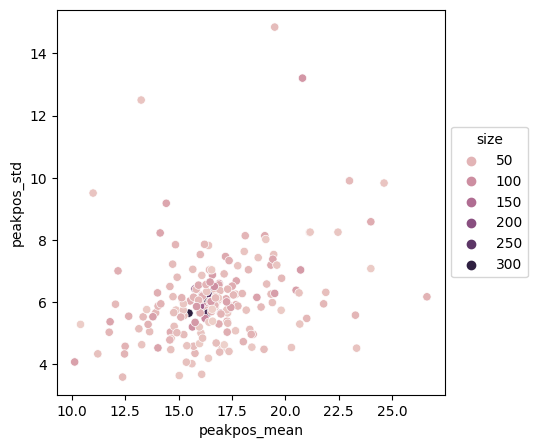

In [15]:
import seaborn as sns
plt.figure(figsize=(5, 5))
ax = sns.scatterplot(data=module_info, x='peakpos_mean', y='peakpos_std', hue='module_size')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='size')
plt.show()

In [17]:
def find_module_by_gene(gene_symbol, module_info):
    gene_symbol = "Gata3"
    sel = module_info['member'].apply(lambda x: gene_symbol in x)
    return module_info[sel]

def find_gene_coworkers(gene_symbol, module_info):
    mod = find_module_by_gene(gene_symbol='Gata3', module_info=module_info)
    return mod.iloc[0]['member'].tolist()

def plot_goi_timeseries(time_series, goi):
    from scipy.stats import zscore
    z_series = time_series.T.apply(zscore).T
    expr_df = z_series.loc[goi]
    import matplotlib.pyplot as plt
    from PyComplexHeatmap import ClusterMapPlotter
    plt.figure(figsize=(3, 10))
    cm = ClusterMapPlotter(data=expr_df.iloc[:50,],z_score=0,
                           row_cluster=False, row_dendrogram=False,
                           col_cluster=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False,row_names_side='left',
                           label='expression',cmap='bwr',#legend_kws={'vmin':-10.3, 'vmax':10.3},
                           rasterized=True, legend=True,legend_anchor='ax_heatmap')

    plt.show()

Starting plotting..


findfont: Font family ['sans serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans serif' not found because none of the following families were found: Arial


Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


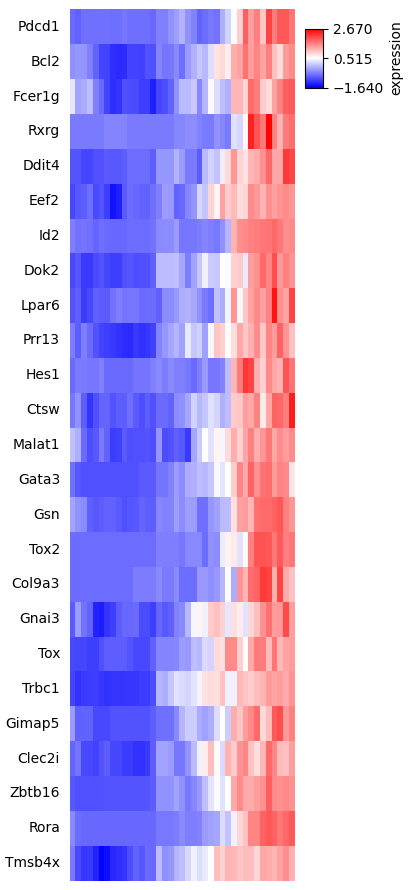

In [18]:
goi = find_gene_coworkers('Gata3', module_info)
plot_goi_timeseries(time_series, goi)

In [20]:
gene_membership.to_csv('gene_membership-ABM.csv')

In [21]:
module_info.to_csv('module_info-ABM.csv')

# below are deprecated

In [ ]:
import igraph as ig

# Create an example graph
g = ig.Graph()
g.add_vertices(6)
g.add_edges([(0, 1), (1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# Define the list of vertex attribute values for the subgraph
attribute_list = ['A', 'B', 'C']

# Get the subgraph based on the vertex attribute values
subgraph = g.subgraph([v.index for v in g.vs if v['attribute'] in attribute_list])

# Print the subgraph summary
print(subgraph.summary())


In [338]:
import igraph as ig

# Create an example graph with vertex attributes
g = ig.Graph()
g.add_vertices(6)
g.add_edges([(0, 1), (1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])
g.vs["label"] = ["A", "B", "C", "D", "E", "F"]

# Define the attribute values for subgraph selection
attribute_value = "B"

# Get the indices of vertices with the specified attribute value
selected_vertices = [v.index for v in g.vs.select(label in attribute_value)]

# Extract the subgraph based on the selected vertices
subgraph = g.subgraph(selected_vertices)

# Print the subgraph summary
print(subgraph.summary())


NameError: name 'label' is not defined

In [ ]:
def get_subgraph_by_gene(g, gene_list, gene_key='name'):
    # Get the indices of vertices with the specified attribute value
    
    
    selected_vertices = [v.index for v in g.vs.select(label=attribute_value)]


In [339]:
import igraph as ig

# Create an example graph with node attributes
g = ig.Graph()
g.add_vertices(5)
g.vs["name"] = ["A", "B", "C", "D", "E"]
g.vs["value"] = [10, 20, 30, 40, 50]

# Iterate over nodes and their attributes
for node in g.vs:
    node_index = node.index
    node_name = node["name"]
    node_value = node["value"]
    print(f"Node index: {node_index}, Name: {node_name}, Value: {node_value}")


Node index: 0, Name: A, Value: 10
Node index: 1, Name: B, Value: 20
Node index: 2, Name: C, Value: 30
Node index: 3, Name: D, Value: 40
Node index: 4, Name: E, Value: 50


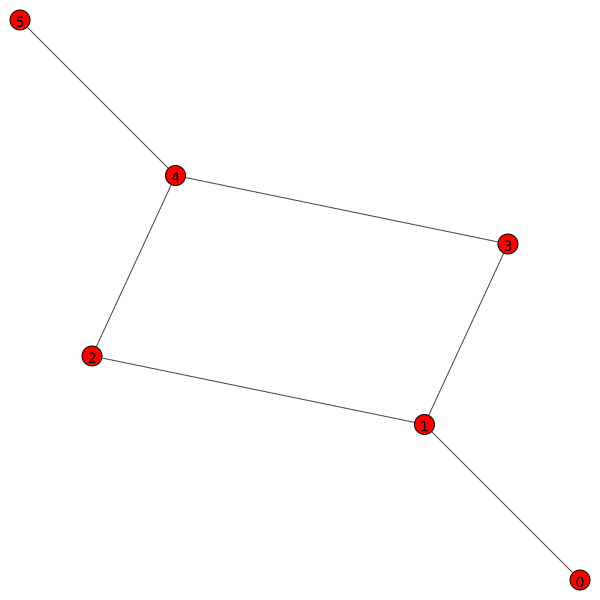

In [275]:
import igraph as ig
from igraph import plot


# Create the plot
visual_style = {}
visual_style["vertex_label"] = [str(i) for i in range(len(g.vs))]
plot(g, **visual_style)

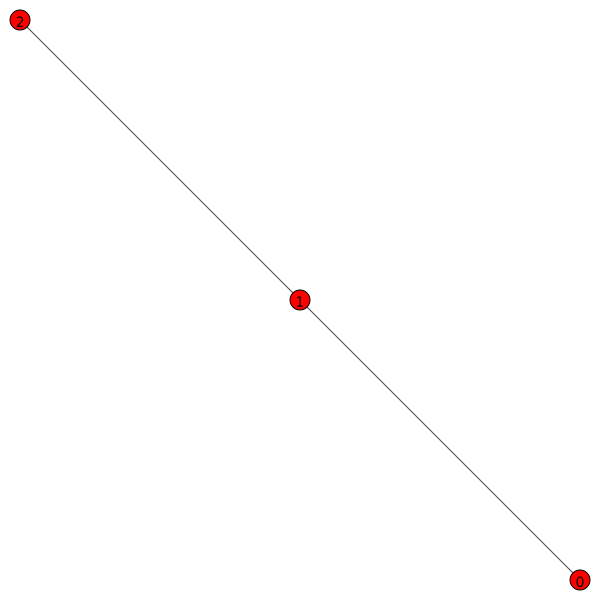

In [277]:
import igraph as ig
from igraph import plot


# Create the plot
visual_style = {}
visual_style["vertex_label"] = [str(i) for i in range(len(subgraph.vs))]
plot(subgraph, **visual_style)

In [ ]:
with open("./ABM-MG.pk", 'rb') as f:
    MG_ABM = pickle.load(f)


In [16]:
z_ABM = multiplex_graph_embedding(MG_ABM, 
                          dimensions_list=[64,32], 
                          walk_length_list=[50,50], 
                          num_walks_list=[50,50], workers=10
                         )

Generating walks (CPU: 20): 100%|██████████| 5/5 [00:06<00:00,  1.27s/it]ng walks (CPU: 15):  80%|████████  | 4/5 [00:03<00:01,  1.04s/it]



















Generating walks (CPU: 20): 100%|██████████| 5/5 [00:47<00:00,  9.45s/it]





















Text(0.5, 1.0, 'TSC Embedded Genes')

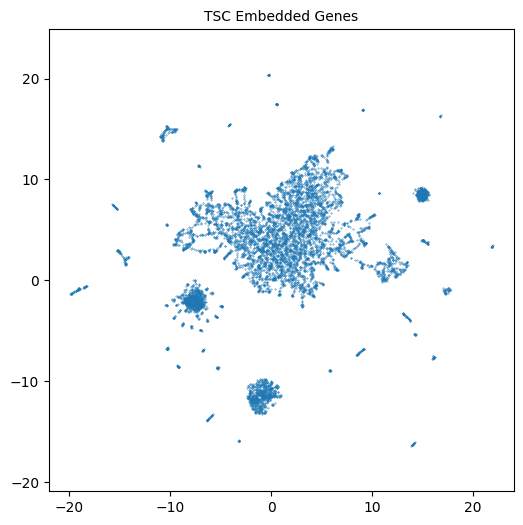

In [20]:
import umap
import matplotlib.pyplot as plt

data = z_ABM
embedding = umap.UMAP(min_dist=0.5).fit_transform(data)

fig = plt.figure(figsize=(6, 6))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], s=.1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('TSC Embedded Genes', fontsize=10)


Text(0.5, 1.0, 'TSC Embedded Genes')

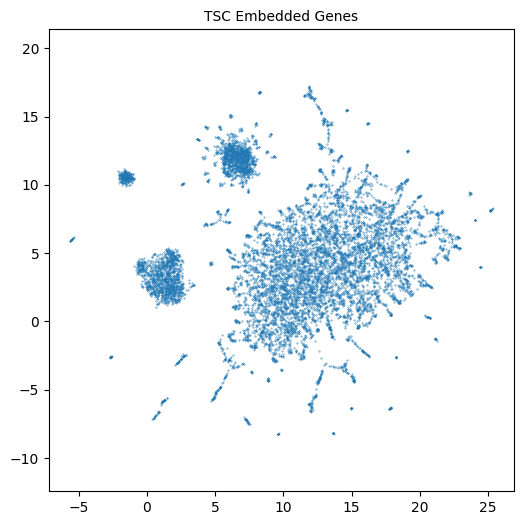

In [21]:
import umap
import matplotlib.pyplot as plt

data = z_ABM
embedding = umap.UMAP(min_dist=0.5).fit_transform(data)

fig = plt.figure(figsize=(6, 6))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], s=.1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('TSC Embedded Genes', fontsize=10)


Text(0.5, 1.0, 'TSC Embedded Genes')

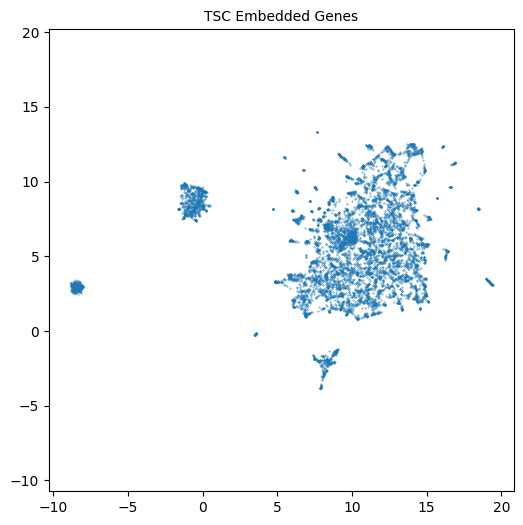

In [28]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP

data = z_ABM
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# First, apply PCA
pca = PCA(n_components=50)
data_pca = pca.fit_transform(data_scaled)

# Then, apply UMAP
umap = UMAP(n_components=2, min_dist=0.2)
data_umap = umap.fit_transform(data_pca)

fig = plt.figure(figsize=(6, 6))
plt.scatter(
    data_umap[:, 0],
    data_umap[:, 1], s=.1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('TSC Embedded Genes', fontsize=10)


Text(0.5, 1.0, 'TSC Embedded Genes')

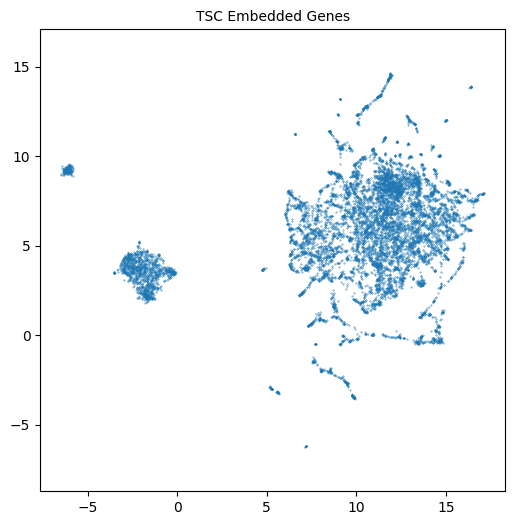

In [27]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP

data = z_ABM
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# First, apply PCA
pca = PCA(n_components=50)
data_pca = pca.fit_transform(data_scaled)

# Then, apply UMAP
umap = UMAP(n_components=2, min_dist=0.2)
data_umap = umap.fit_transform(data_pca)

fig = plt.figure(figsize=(6, 6))
plt.scatter(
    data_umap[:, 0],
    data_umap[:, 1], s=.1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('TSC Embedded Genes', fontsize=10)
